In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

## To import a dataset from kaggle into Google Colab follow these steps :

First , download kaggle.json by creating New API token under API section in kaggle account settings .

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hiteshbhatnagar","key":"e201a58ba519471d1d6c10af03d3d68e"}'}

In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json


Now for downloading the dataset

*   go to kaggle dataset page which you want to download
*   choose three dots near download option
*   select copy API command
*   then type


```
!kaggle datasets download -d dataset-identifier

```
and replace **dataset-identifiers** with the copied API




In [ ]:
!kaggle datasets download -d iammustafatz/diabetes-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset
License(s): copyright-authors
  0% 0.00/734k [00:00<?, ?B/s]
100% 734k/734k [00:00<00:00, 116MB/s]


Check for the files and zip folder in the current notebook

In [ ]:
!ls

diabetes-prediction-dataset.zip  kaggle.json  sample_data


Now, unzip the downlaoded dataset

In [ ]:
!unzip diabetes-prediction-dataset.zip

Archive:  diabetes-prediction-dataset.zip
  inflating: diabetes_prediction_dataset.csv  


Now, load the dataset into a pandas DataFrame

In [ ]:
df = pd.read_csv('diabetes_prediction_dataset.csv')
print(df.head())

   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


Now your Dataset has been loaded into your notebook

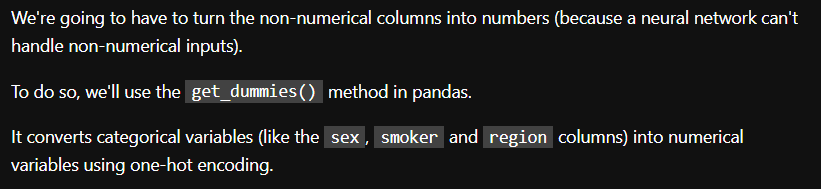

In [ ]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [ ]:
# Turn all categories into numbers
# Step 1 : Preprocess Data
# Convert boolean columns to integers
# Map gender column to integers
gender_mapping = {'Male': 1, 'Female': 0}
df['gender'] = df['gender'].map(gender_mapping)

# One-hot encode the 'smoking_history' column
df = pd.get_dummies(df, columns=['smoking_history'])


In [ ]:
df

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0.0,80.0,0,1,25.19,6.6,140,0,False,False,False,False,True,False
1,0.0,54.0,0,0,27.32,6.6,80,0,True,False,False,False,False,False
2,1.0,28.0,0,0,27.32,5.7,158,0,False,False,False,False,True,False
3,0.0,36.0,0,0,23.45,5.0,155,0,False,True,False,False,False,False
4,1.0,76.0,1,1,20.14,4.8,155,0,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,80.0,0,0,27.32,6.2,90,0,True,False,False,False,False,False
99996,0.0,2.0,0,0,17.37,6.5,100,0,True,False,False,False,False,False
99997,1.0,66.0,0,0,27.83,5.7,155,0,False,False,False,True,False,False
99998,0.0,24.0,0,0,35.42,4.0,100,0,False,False,False,False,True,False


In [ ]:
print(df.isna().sum())

gender                         18
age                             0
hypertension                    0
heart_disease                   0
bmi                             0
HbA1c_level                     0
blood_glucose_level             0
diabetes                        0
smoking_history_No Info         0
smoking_history_current         0
smoking_history_ever            0
smoking_history_former          0
smoking_history_never           0
smoking_history_not current     0
dtype: int64


In [ ]:
df['smoking_history_No Info'] = df['smoking_history_No Info'].astype(int)
df['smoking_history_current'] = df['smoking_history_current'].astype(int)
df['smoking_history_former'] = df['smoking_history_former'].astype(int)
df['smoking_history_never'] = df['smoking_history_never'].astype(int)
df['smoking_history_ever'] = df['smoking_history_ever'].astype(int)
df['smoking_history_not current'] = df['smoking_history_not current'].astype(int)

In [ ]:
df

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0.0,80.0,0,1,25.19,6.6,140,0,0,0,0,0,1,0
1,0.0,54.0,0,0,27.32,6.6,80,0,1,0,0,0,0,0
2,1.0,28.0,0,0,27.32,5.7,158,0,0,0,0,0,1,0
3,0.0,36.0,0,0,23.45,5.0,155,0,0,1,0,0,0,0
4,1.0,76.0,1,1,20.14,4.8,155,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,80.0,0,0,27.32,6.2,90,0,1,0,0,0,0,0
99996,0.0,2.0,0,0,17.37,6.5,100,0,1,0,0,0,0,0
99997,1.0,66.0,0,0,27.83,5.7,155,0,0,0,0,1,0,0
99998,0.0,24.0,0,0,35.42,4.0,100,0,0,0,0,0,1,0


Now we split the data into features X and Y

In [ ]:
# Create X and Y values
X = df.drop("bmi",axis=1)
Y =df["bmi"]

In [ ]:
# VIew the features
X.head()

,gender,age,hypertension,heart_disease,HbA1c_level,blood_glucose_level,diabetes,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0.0,80.0,0,1,6.6,140,0,0,0,0,0,1,0
1,0.0,54.0,0,0,6.6,80,0,1,0,0,0,0,0
2,1.0,28.0,0,0,5.7,158,0,0,0,0,0,1,0
3,0.0,36.0,0,0,5.0,155,0,0,1,0,0,0,0
4,1.0,76.0,1,1,4.8,155,0,0,1,0,0,0,0


In [ ]:
# Y values for BMI
Y

0        25.19
1        27.32
2        27.32
3        23.45
4        20.14
         ...  
99995    27.32
99996    17.37
99997    27.83
99998    35.42
99999    22.43
Name: bmi, Length: 100000, dtype: float64

Now , create **training & test sets** by using

```
from sklearn.model_selection import train_test_split
```



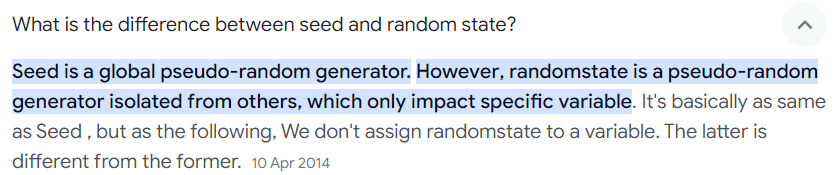

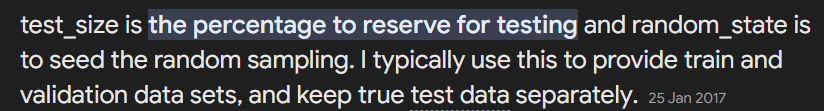

## Create training and test sets

In [ ]:
# Create training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [ ]:
X_train , X_test , Y_train , Y_test

(       gender   age  hypertension  heart_disease  HbA1c_level  \
 75220     1.0  73.0             0              0          3.5   
 48955     1.0  80.0             0              0          5.7   
 44966     0.0  38.0             0              0          4.0   
 13568     0.0  26.0             0              0          5.0   
 92727     0.0  61.0             1              0          4.5   
 ...       ...   ...           ...            ...          ...   
 6265      1.0  49.0             0              0          5.7   
 54886     0.0  15.0             0              0          5.0   
 76820     1.0  42.0             0              0          5.8   
 860       0.0  37.0             0              0          6.2   
 15795     0.0  23.0             0              0          5.0   
 
        blood_glucose_level  diabetes  smoking_history_No Info  \
 75220                   80         0                        0   
 48955                  145         1                        0   
 44966  

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Standardize the features (mean =0 ,std =1)

scaler = StandardScaler()
X_train =scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Keras Tunner for automating the selection of Hyperparameters

Keras Tuner is a library that helps with hyperparameter optimization for your Keras and TensorFlow models.

***You should consider using Keras Tuner in the following scenarios:***

1) Improving Model Performance:

2) Complex Models with Many              Hyperparameters:

3) Automating the Hyperparameter Search:

4)Building Robust Models:


In [ ]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.4 MB/s eta 0:00:00


In [ ]:
import numpy as np

print(f'X_train shape: {X_train.shape}')
print(f'Y_train shape: {Y_train.shape}')
print(f'Number of NaNs in X_train: {np.isnan(X_train).sum()}')
print(f'Number of NaNs in Y_train: {np.isnan(Y_train).sum()}')


X_train shape: (80000, 13)
Y_train shape: (80000,)
Number of NaNs in X_train: 16
Number of NaNs in Y_train: 0


In [ ]:
## Identifying columns with NaNs

nan_columns = df.columns[df.isna().any()].tolist()
print(f'Columns with Nans : {nan_columns}')

Columns with Nans : ['gender']


In [ ]:
# ------------------------   OPTION 1
#  Impute missing values
#  For simplicity we'll use mean imputation here

for column in nan_columns:
  df[column].fillna(df[column].mean(), inplace = True)


In [ ]:
X = df.drop(columns=['bmi']).values
Y = df['bmi'].values

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print(f'X_train shape: {X_train.shape}')
print(f'Y_train shape: {Y_train.shape}')
print(f'Number of NaNs in X_train: {np.isnan(X_train).sum()}')
print(f'Number of NaNs in Y_train: {np.isnan(Y_train).sum()}')

X_train shape: (80000, 13)
Y_train shape: (80000,)
Number of NaNs in X_train: 0
Number of NaNs in Y_train: 0


Now , Confirm

In [ ]:
print(f'Number of NaNs in X_train: {np.isnan(X_train).sum()}')
print(f'Number of NaNs in Y_train: {np.isnan(Y_train).sum()}')

Number of NaNs in X_train: 0
Number of NaNs in Y_train: 0


Define a Hypermodel :


---

A HyperModel is a class that encapsulates a model-building function, with hyperparameters defined using the Keras Tuner API.

In [ ]:

from keras_tuner import HyperModel

class RegressionHyperModel(HyperModel):
    def build(self, hp):
        model = tf.keras.Sequential()
        model.add(tf.keras.layers.Dense(
            units=hp.Int('units', min_value=32, max_value=512, step=32),
            activation='relu',
            input_shape=(X_train.shape[1],)
        ))

        for i in range(hp.Int('num_layers', 1, 3)):
            model.add(tf.keras.layers.Dense(
                units=hp.Int(f'units_{i}', min_value=32, max_value=512, step=32),
                activation='relu'
            ))

        model.add(tf.keras.layers.Dense(1))

        model.compile(optimizer='adam', loss='mae', metrics=['mae'])

        return model


Choose a Tuner :


---
Keras Tuner provides several tuners: RandomSearch, Hyperband, BayesianOptimization, and Sklearn.


In [ ]:
# Initialize the tuner

from kerastuner.tuners import RandomSearch


tuner = RandomSearch(
    RegressionHyperModel(),
    objective='val_mae',
    max_trials=10,
    executions_per_trial=1,
    directory='my_dir',
    project_name='regression_tuning')

Search for the best Hyperparameters :    


---
Use the search method to start the hyperparameter tuning process.


In [ ]:
tuner.search(X_train ,
             Y_train,
             epochs=25,
             validation_split=0.2)

Trial 10 Complete [00h 03m 23s]
val_mae: 3.804083824157715

Best val_mae So Far: 3.7667787075042725
Total elapsed time: 00h 40m 53s


Retrieve the Best Model:


---


Once the search is complete, you can retrieve the best model and its hyperparameters.

In [ ]:
# Retrieve the best model

best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
print(f'best_model : {best_model}')
print(f'best_hyperparameters : {best_hyperparameters}')

best_model : <keras.src.engine.sequential.Sequential object at 0x7cbed037e050>
best_hyperparameters : <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters object at 0x7cbe6c484df0>


## Build the final model

use the retrieved Hyperparameters to build your model .

In [ ]:
def build_final_model(hp):
  model=tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(
      units= hp.get('units'),
      activation='relu',
      input_shape = (X_train.shape[1],)
  ))

  for i in range(hp.get('num_layers')):
    model.add(tf.keras.layers.Dense(
        units=hp.get(f'units_{i}'),
        activation='relu'
    ))

    model.add(tf.keras.layers.Dense(1))

    model.compile(optimizer='adam',
    loss='mae',
                  metrics=['mae'])

    return model


final_model = build_final_model(best_hyperparameters)


## Train the final model

In [ ]:
history = final_model.fit(X_train, Y_train , epochs =100 , validation_split = 0.2)

Epoch 1/100
2000/2000 [==============================] - 9s 3ms/step - loss: 5.1505 - mae: 5.1505 - val_loss: 4.1387 - val_mae: 4.1387
Epoch 2/100
2000/2000 [==============================] - 6s 3ms/step - loss: 3.9749 - mae: 3.9749 - val_loss: 3.8618 - val_mae: 3.8618
Epoch 3/100
2000/2000 [==============================] - 7s 3ms/step - loss: 3.9138 - mae: 3.9138 - val_loss: 3.8910 - val_mae: 3.8910
Epoch 4/100
2000/2000 [==============================] - 6s 3ms/step - loss: 3.8991 - mae: 3.8991 - val_loss: 3.8509 - val_mae: 3.8509
Epoch 5/100
2000/2000 [==============================] - 7s 3ms/step - loss: 3.8886 - mae: 3.8886 - val_loss: 3.8511 - val_mae: 3.8511
Epoch 6/100
2000/2000 [==============================] - 6s 3ms/step - loss: 3.8777 - mae: 3.8777 - val_loss: 3.8701 - val_mae: 3.8701
Epoch 7/100
2000/2000 [==============================] - 7s 3ms/step - loss: 3.8734 - mae: 3.8734 - val_loss: 3.8554 - val_mae: 3.8554
Epoch 8/100
2000/2000 [==============================] 

# Evaluate the final model on the test set


In [ ]:
test_loss , test_mae = final_model.evaluate(X_test, Y_test, verbose = 1)
print(f'Test Loss: {test_loss}, Test MAE: {test_mae}')

625/625 [==============================] - 1s 2ms/step - loss: 3.8787 - mae: 3.8787
Test Loss: 3.8787362575531006, Test MAE: 3.8787362575531006


## Predict with the final model

In [ ]:
Y_pred = final_model.predict(X_test)

625/625 [==============================] - 1s 2ms/step


## Plot training & validation loss values


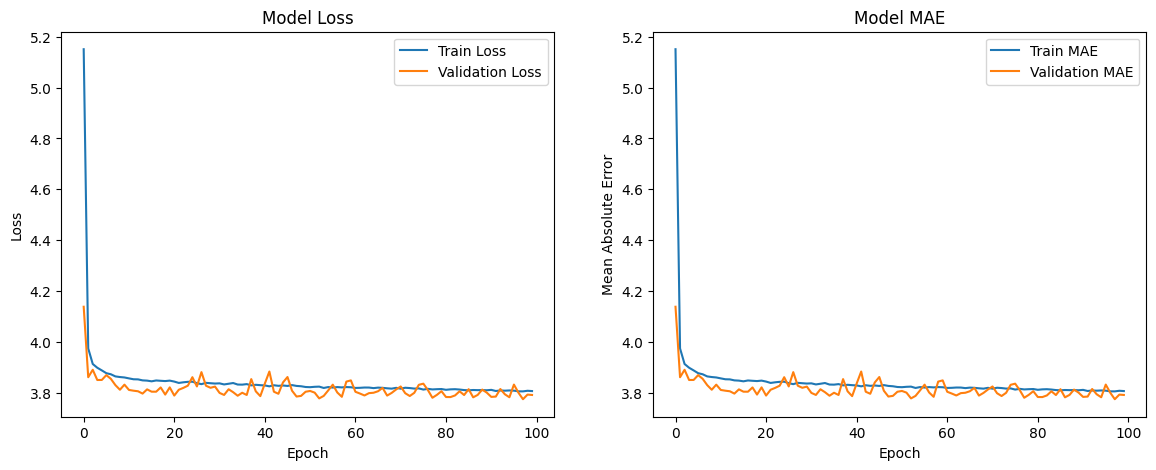

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')

plt.show()

## Save the model

In [ ]:
final_model.save('diabetes_prediction_model.keras')